#### Actividad: Actividad Deep Learning CIFAR-10
#### Nombre: Luis Rodolfo Bojorquez Pineda
#### Matricula: A01250513

### Importamos las librerías necesarias.

In [46]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

### Cargamos la base de datos CIFAR-10

In [47]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

### Normalizamos los datos

In [48]:
train_images, test_images = train_images/255.0, test_images/255.0

### Graficamos las primeras 25 imagenes del dataset

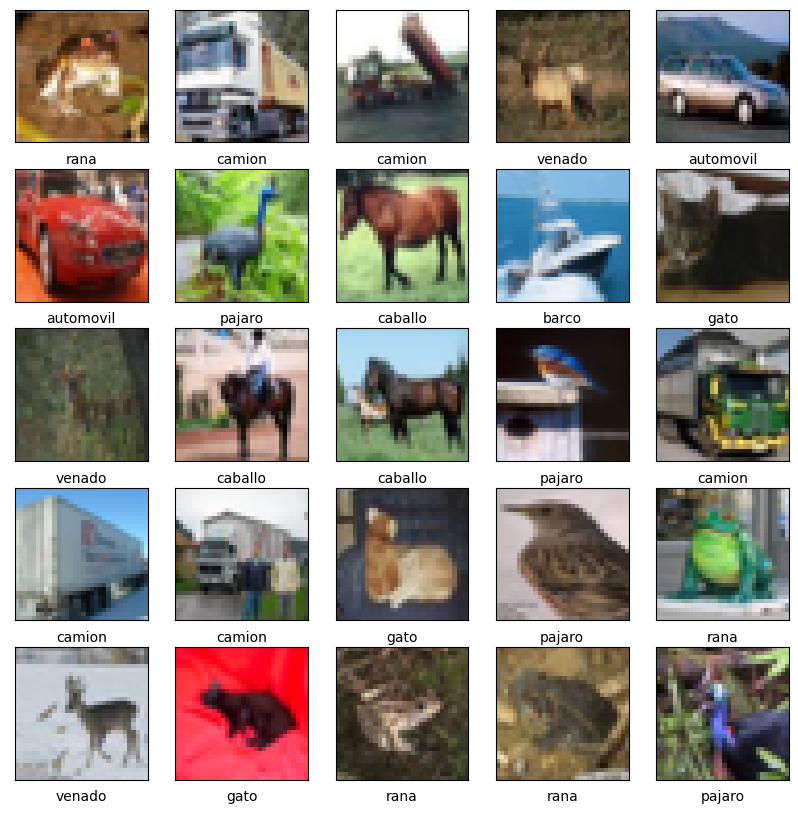

In [49]:
class_names = ['avion', 'automovil', 'pajaro', 'gato', 'venado', 'perro', 'rana', 'caballo', 'barco', 'camion']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
    plt.xticks([])
    plt.yticks([])
plt.show()


### Capas de convolución

In [50]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(267, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

### Arquitectura de la red

In [51]:
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 15, 15, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 13, 13, 256)       147712    
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 6, 6, 256)         0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 4, 4, 267)         615435    
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 2, 2, 267)        

### Generamos capas densas

In [52]:
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='sigmoid'))

### Volvemos a ver la arquitectura de la red

In [53]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 15, 15, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 13, 13, 256)       147712    
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 6, 6, 256)         0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 4, 4, 267)         615435    
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 2, 2, 267)        

### Compilamos el modelo

In [54]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Entrenamos el modelo

In [55]:
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 [==============================] - 65s 41ms/step - loss: 1.4941 - accuracy: 0.4600 - val_loss: 1.1979 - val_accuracy: 0.5619
Epoch 2/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.0315 - accuracy: 0.6402 - val_loss: 0.9111 - val_accuracy: 0.6849
Epoch 3/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8360 - accuracy: 0.7103 - val_loss: 0.8808 - val_accuracy: 0.6931
Epoch 4/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.7087 - accuracy: 0.7534 - val_loss: 0.8030 - val_accuracy: 0.7220
Epoch 5/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.6046 - accuracy: 0.7889 - val_loss: 0.8007 - val_accuracy: 0.7304
Epoch 6/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.5152 - accuracy: 0.8203 - val_loss: 0.8000 - val_accuracy: 0.7426
Epoch 7/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.4367 - accuracy: 0.8471 - val_loss: 0.8240 -

### Evaluamos el modelo

313/313 - 3s - loss: 1.0485 - accuracy: 0.7284 - 3s/epoch - 11ms/step


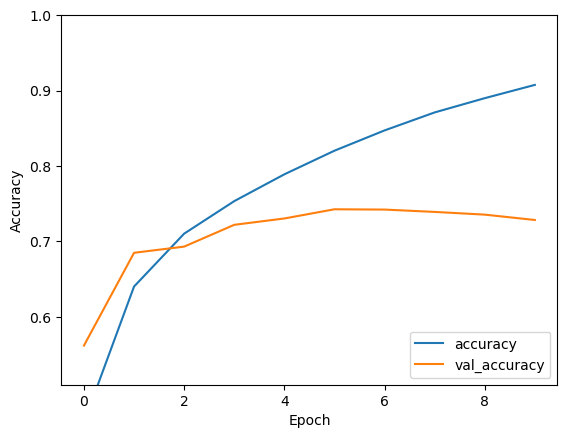

In [56]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.510,1])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

### Imprimimos la precisión del modelo

In [57]:
print(test_acc)

0.7283999919891357


### Predecimos las etiquetas de las imágenes de prueba

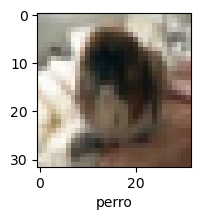

In [58]:
n = 200

plt.figure(figsize=(2,2))
plt.imshow(test_images[n])
plt.xlabel(class_names[test_labels[n][0]])
plt.show()

In [59]:
predictions = model.predict(test_images)
print(predictions[n])

import numpy as np

print('La imagen pertenece al grupo {} con una probabilidad de {:2f} %'
      .format(class_names[np.argmax(predictions[n])], 100 * np.max(predictions[n])))

313/313 [==============================] - 4s 11ms/step
[5.49184484e-03 4.52411138e-02 9.26821887e-01 9.99869168e-01
 9.64995086e-01 9.99965131e-01 7.46347189e-01 8.27987254e-01
 1.69164687e-03 5.19784749e-01 1.83169868e-11 2.78707352e-11
 4.18961255e-10 1.59620737e-11 1.42381357e-10 1.90483618e-11
 1.93198981e-11 1.76825415e-10 6.82865361e-11 4.65609495e-12
 9.45415100e-12 6.46065956e-09 4.97058089e-11 7.38178442e-12
 8.38192640e-11 4.01974461e-11 1.44226916e-13 5.29538349e-12
 1.44472585e-12 5.73891195e-13 4.40043878e-12 2.28159241e-10
 2.34332154e-09 6.97348321e-13 3.95283195e-10 2.03335948e-09
 9.33160558e-13 7.09007549e-12 4.85828868e-12 9.83115499e-12
 5.76880991e-12 9.71917100e-13 3.03139874e-11 4.71437958e-11
 4.32055650e-12 1.71211812e-11 4.19262194e-12 2.32284920e-11
 1.33520153e-10 3.85418216e-12 6.42484788e-10 2.33766867e-10
 8.26038109e-12 1.93719151e-12 1.92084434e-12 4.53096241e-12
 8.50173144e-12 9.03396823e-13 3.04362763e-12 1.05360848e-12
 1.09143788e-11 1.58222865e-1